<a href="https://colab.research.google.com/github/aymenhmid/Crowd-estimator/blob/master/Attribute_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import packages

In [ ]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import wordpunct_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install -U nlpcube
from cube.api import Cube

cube=Cube(verbose=True)
cube.load("fr")

In [ ]:
!pip install transformers
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
!pip install  -U spacy

In [ ]:
!python -m spacy download fr_core_news_lg

#Data_Processing

In [ ]:
s9_data=pd.read_csv('/content/drive/MyDrive/s9.csv')
s99_data=pd.read_csv('/content/drive/MyDrive/s99.csv')
Samsung_dataset=pd.concat([s9_data, s99_data], ignore_index=True)

In [ ]:
my_data=pd.read_csv('/content/drive/MyDrive/phones.csv')
my_data=my_data.dropna()
my_data=my_data.drop_duplicates()
my_data=my_data.reset_index()

In [ ]:
def prep(review):
    
    # Remove HTML tags.
    review = BeautifulSoup(review,'html.parser').get_text()
    # Remove non-letters
    review = re.sub(r',[^ \nA-Za-z0-9À-ÖØ-öø-ÿЀéè-ӿ/]+.', "", review)
    # Lower case
    review = review.lower()
    review=review.strip()
    # Tokenize to each word.
    token=wordpunct_tokenize(review)
    #token = nltk.word_tokenize(review,language='french')
    # Join the words back into one string separated by space, and return the result.
    return "".join(review)


In [ ]:
#clean_comments=[]
#for review in Samsung_dataset['comment']:
  #x=prep(review)
  #clean_comments.append(x)
#Samsung_dataset['clean']=Samsung_dataset['comment'].apply(prep)

In [ ]:
clean_comments=[]
for review in my_data['Comment']:
  x=prep(review)
  clean_comments.append(x)
my_data['clean']=my_data['Comment'].apply(prep)

In [ ]:
my_data['clean'][4]

"excellent rapport qualité prix, téléphone fluide et sans trop de surcouche. pas le meilleur appareil photo mais pour le prix c'est normal"

#Extraction

In [ ]:
fr_stopword_list=['un','qui','alors','au','aussi','autre','autres','avant','avec','avoir'
'car','ce','cela','ces','ceux','chaque','ci','comme','comment','dans','des','du',
'dedans','dehors','depuis','devrait','doit','donc','dos','début','elle','elles','en','encore','essai',
'est','et','fois','font','hors','ici','il','ils','je','première','1er','2019','de','ce',
'cette','aux','récent','précédentes','.',',',':','!','?','la','le','boulanger',
'la','le','les','leur','là','qualité','vraiment','jour',"téléphone","qualité",
"appareil","sont","rapport",'smartphone','telephone','samsung','produit','jour','mois','achat','point'
'ma','maintenant','mais','mes','mien','moins','mon','mot','même','ni','rien','fait','achat','sont',
'nommés','notre','nous','ou','où','recommande','apple','xiaomi',
'par','parce','pas','peut','peu','plupart','pour','pourquoi','quand','que','quel','quelle',
'quelles','quels','qui','sa','sans','ses','seulement','si','sien','sous','soyez','suis','une','les','\\','sujet','sur','ta','tandis','tellement','tels',
'tes','ton','tous','tout','après','samsung','afin','téléphone','plus','produit',
'smartphone','iphone','bien','appareil','rapport','mois','ans','ai','ne','galaxie','galaxy']

In [ ]:
def extract(reviews_list):
  #Tags=['ADJ','NOUN']
 #reviews_list=list(Samsung_dataset['clean'][1001:])
 feature_list1=[]

 for review in reviews_list:
  sentences=cube(review)
  for s in sentences:
    for i in range(1,len(s)-1):
      if (s[i].upos=='ADJ' and s[i-1].upos=='NOUN') and (s[i].word not in fr_stopword_list):
        feature_list1.append(s[i-1].word+' '+s[i].word)
      elif (s[i].upos=='ADJ' and s[i+1].upos=='NOUN')  and (s[i].word not in fr_stopword_list):
        feature_list1.append(s[i].word+' '+s[i+1].word)
      elif (s[i].upos=='NOUN' and s[i-1].upos=='ADJ') and (s[i].word not in fr_stopword_list):
        feature_list1.append(s[i-1].word+' '+s[i].word)


      elif (s[i].upos=='NOUN' and s[i+1].upos=='ADJ') and (s[i].word not in fr_stopword_list):
        feature_list1.append(s[i].word+' '+s[i+1].word)
      elif (s[i].word=='est') and (s[i+1].upos=='ADJ') and (s[i-1].upos=='NOUN'):
        feature_list1.append(s[i-1].word+' '+s[i+1].word)
      elif s[i].upos=='ADV' and s[i-1].upos=='NOUN' and s[i+1].upos=='ADJ':
        feature_list1.append(s[i-1].word+' '+s[i].word+' '+s[i+1].word)
 feature_list=list(dict.fromkeys(feature_list1))

 return feature_list

In [ ]:
L=extract(list(my_data['clean'][0:20]))

In [ ]:
L

In [ ]:
comments=list(my_data['Comment'])

In [ ]:
for s in L:
  if s in comments[i]

In [ ]:
for w in L:
 pokemon_games = my_data.loc[my_data['clean'].str.contains('bel écran', case=False)]

In [ ]:
pokemon_games=pokemon_games.drop_duplicates()

In [ ]:
pokemon_games

,index,Comment,Date,ID,Rating,Title,category,name,price,clean
19,41,LE VENDEUR S4EST CHARGE DE MISE EN ROURE,2021-03-25,1156591.0,5.0,BON,high-tech,Smartphone Samsung Galaxy A12 Noir | Boulanger,189.0,le vendeur s4est charge de mise en roure
1672,1785,LE VENDEUR S4EST CHARGE DE MISE EN ROURE,2021-03-25,1156593.0,5.0,BON,high-tech,Smartphone Samsung Galaxy A12 Bleu | Boulanger,189.0,le vendeur s4est charge de mise en roure
19465,20181,LE VENDEUR S4EST CHARGE DE MISE EN ROURE,2021-03-25,1156592.0,5.0,BON,high-tech,Smartphone Samsung Galaxy A12 Blanc | Boulanger,189.0,le vendeur s4est charge de mise en roure


#Get-sent

In [ ]:
def get_sentiment(text):
  sent = classifier(text)
  #print(sent)
  label,score = sent[0]['label'],sent[0]['score']
  if label == '1 star' or label == '2 stars':
    return "Negative"
  elif label == '3 stars':
    return "Neutre"
  elif label == '4 stars' or label=='5 stars':
    return "Positive"


In [ ]:
sent_list=[]
for w in L:
  x=get_sentiment(w)
  sent_list.append(x)

In [ ]:
labels_dict=dict(zip(L, sent_list))

In [ ]:
labels_dict.items()

dict_items([('bon produit', 'Positive'), ('caractéristiques techniques', 'Positive'), ('bonnes qualités', 'Positive'), ('gamme moyen', 'Neutre'), ('téléphone fluide', 'Positive'), ('meilleur appareil', 'Positive'), ('bel écran', 'Positive'), ('prix abordable', 'Positive'), ('grand smartphone', 'Positive'), ('prix mini', 'Positive'), ('usage fréquent', 'Neutre'), ('bon rapport', 'Positive'), ('meilleur rapport', 'Positive'), ('petit livret', 'Neutre'), ('téléphone portable', 'Positive'), ('vendeur s4est', 'Positive')])

In [ ]:
import re
my_data['target']=[]
patterns=L
for w,p in zip(my_data['clean'], L):

  print('looking for match')
  if re.search(p,w):
    
    

#Freq_analysis

In [ ]:
#Apply lemmatization
import spacy
import fr_core_news_lg
def lemmatization(L):
#import fr_core_news_md
 attrs=[]
 nlp =fr_core_news_lg.load()
 for rev in L:

  doc = nlp(rev)
  for token in doc:
    if (token.pos_=='NOUN') and (len(token.text)>=3):
     attrs.append(token.lemma_)
 return attrs
    #print(token, token.lemma_)

In [ ]:
x=lemmatization(L)

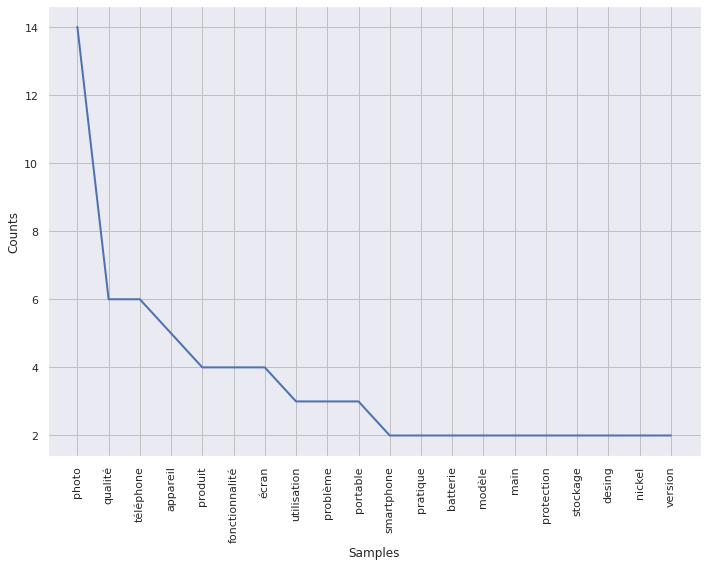

In [ ]:
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(x)
nlp_words.plot(20)

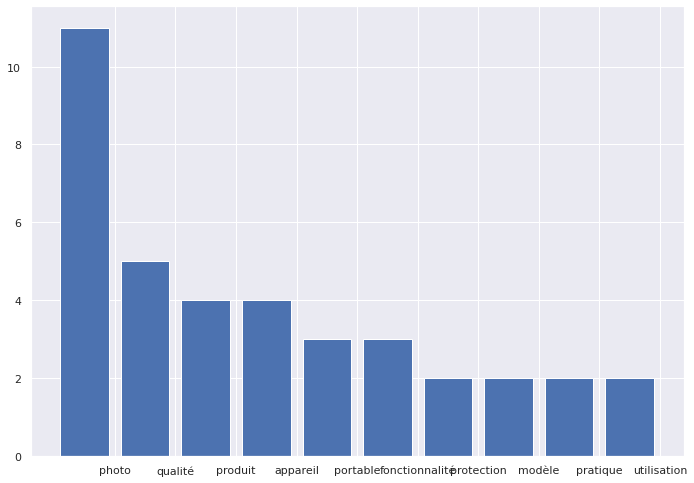

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

counts = dict(Counter(x).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.5

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd 
def tf_idf(l):
 
#instantiate CountVectorizer() 
 l=lemmatization(L)
 cv=CountVectorizer(l,stop_words=fr_stopword_list) 
 
# this steps generates word counts for the words in your docs 
 word_count_vector=cv.fit_transform(l)
 tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
 tfidf_transformer.fit(word_count_vector)
# print idf values 
 df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["tf_idf_weights"]) 
 
# sort ascending 
 df=df_idf.sort_values(by=['tf_idf_weights'])[0:12]
 
 return list(df.index)


In [ ]:
tf_idf(x)

In [ ]:
freq_features=[]
filtered_features=tf_idf(x)

for i in range(0,len(L)):
  t=L[i].split()
  for w in t:
    if w in filtered_features:

      freq_features.append((L[i].replace(w,''),w))

In [ ]:
freq_features1=[]
filtered_features=tf_idf(x)

for i in range(0,len(L)):
  t=L[i].split()
  for w in t:
    if w in filtered_features:

      freq_features1.append(L[i])

In [ ]:
def get_adj(filtered_features):

 feat1, feat2, feat3, feat4, feat5 = ([] for i in range(5))
 feat6,feat7,feat8,feat9,feat10=([] for i in range(5))
 for s in freq_features:
  
  if s.find(filtered_features[0])>=0:
    feat1.append(s.replace(filtered_features[0],''))
  elif s.find(filtered_features[1])>=0:
    feat2.append(s.replace(filtered_features[1],''))
  elif s.find(filtered_features[2])>=0:
    feat3.append(s.replace(filtered_features[2],''))
  elif s.find(filtered_features[3])>=0:
    feat4.append(s.replace(filtered_features[3],''))
  elif s.find(filtered_features[4])>=0:
    feat5.append(s.replace(filtered_features[4],''))
  elif s.find(filtered_features[5])>=0:
    feat6.append(s.replace(filtered_features[5],''))
  elif s.find(filtered_features[6])>=0:
    feat7.append(s.replace(filtered_features[6],''))
  elif s.find(filtered_features[7])>=0:
    feat8.append(s.replace(filtered_features[7],''))
  elif s.find(filtered_features[8])>=0:
    feat9.append(s.replace(filtered_features[8],''))
  elif s.find(filtered_features[9])>=0:
    feat10.append(s.replace(filtered_features[9],''))

 return feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10


In [ ]:
get_adj(filtered_features)

#Similarity_with_Spacy

In [ ]:
clean_batterie_adj=[]
for review in batterie_adj:
  sentences=cube(review)
  for s in sentences:
    for i in s:
      if i.upos=='ADJ':
        clean_batterie_adj.append(i.lemma)

In [ ]:
def get_sentiment(text):
  sent = classifier(text)
  #print(sent)
  label,score = sent[0]['label'],sent[0]['score']
  if label == '1 star' or label == '2 stars':
    return "Negative"
  elif label == '3 stars':
    return "Neutre"
  elif label == '4 stars' or label=='5 stars':
    return "Positive"
def polarity(sent_list):
 Pos=[]
 Neg=[]
 Neut=[]
 sentiment_list=[]
 for feat in sent_list:
  x=get_sentiment(feat)
  if x=='Positive':
   Pos.append(feat)
  elif x=='Negative':
    Neg.append(feat)
  else:
    Neut.append(feat)
 return Pos,Neg,Neut   

In [ ]:
l=polarity(clean_batterie_adj)[0]

In [ ]:
l1=polarity(clean_batterie_adj)[1]

In [ ]:
import spacy
def listToString(s): 
    
    # initialize an empty string
    str1 = " "
    return (str1.join(s))
  
nlp =fr_core_news_lg.load()
def similarity(sent_list):  
#print("Enter two space-separated words")
 words = listToString(sent_list)
  
 tokens = nlp(words)
 My_list=[]
 for token1 in tokens:
  for token2 in tokens:
    # Printing the following attributes of each token.
    # text: the word string, has_vector: if it contains
    # a vector representation in the model, 
    # vector_norm: the algebraic norm of the vector,
    # is_oov: if the word is out of vocabulary.
    #print(token.text, token.has_vector, token.vector_norm, token.is_oov)
  
#token1, token2 = tokens[0], tokens[1]
#for i in range(1,len(tokens)):
      if token1.similarity(token2)>0.6 and token1.similarity(token2)!=1.0:
        #Pos1.remove(str (token2))
        My_list.append((token1.text,token2.text))
        
  return My_list      #return (token1.text,token2.text, token1.similarity(token2))      #print((token1.text,token2.text),'similarity:',token1.similarity(token2))

In [ ]:
print('batterie\n','pros:',l,'\n cons:', l1)

batterie
 pros: ['beau', 'bon', 'moderne', 'bon', 'grand', 'super', 'super', 'superbe', 'digne', 'portable', 'excellent', 'genial', 'tre', 'excellent', 'lte'] 
 cons: ['décevant', 'faible', 'insuffisant', 'faible', 'défaillant', 'nul', 'excessif', 'difficile', 'médiocre', 'lamentable']


#Similarity_with_fasttext

In [ ]:
!pip install fasttext
import fasttext.util
fasttext.util.download_model('fr', if_exists='ignore')
ft = fasttext.load_model('cc.fr.300.bin')

In [ ]:
syn=['beau','joli','mangifique']
het=[]
for w in syn:
  L=ft.get_nearest_neighbors(w,k=10)
  het.append(L)

In [ ]:
for i in range(0,len(syn)):
  for s in syn[0]:
    print(s[1])

In [ ]:
adjs=[]
for i in range(0,len(syn)):
  for s in syn[i]:
    if s[0]>0.7:
      adjs.append((l[i],s[1]))

In [ ]:
adjs

In [ ]:
l=list(dict.fromkeys(l))

============================================================================================================================================================

In [ ]:
K=[]
for combination in zip(L, my_data['clean']):
   K.append(combination)

In [ ]:
K=list(my_data['clean'][0:20])
patterns=L
any([ p in s for p in patterns for s in K ])

True

In [ ]:
while x in 
  for i in range(0,len(K)):
